# Traffic Death Analysis

In this exercise, we will be analyzing the effect of alcohol taxes on traffic death in the United States.  The data set used in this exercise, `fatalities.csv`, is a state-year panel dataset (meaning it includes data on multiple states, and the data includes several years of data for each state. The data contains 336 observations on 34 variables. The variables used in the exercise are defined as follows:

`state`: factor variable indicating states

`year`: factor variable indicating years

`beertax`: numeric variable, Tax on the case of beer

In these exercises, we'll be looking at how beer taxes (which are believed to reduce alcohol consumption, potentially reducing drunk driving deaths) impact car accident fatality rates. 

More specifically, though, we'll be approaching our estimation of the impact of beer taxes in a few different ways in an effort to give you more of an intuitive sense of what happens when you add fixed effects to a regression. 

## Exercise 1

Download and load the data from [this link](https://media.githubusercontent.com/media/nickeubank/MIDS_Data/master/us_driving_fatalities.csv), or by going to [www.github.com/nickeubank/MIDS_Data/](www.github.com/nickeubank/MIDS_Data/) and downloading the `us_driving_fatalities.csv` dataset. 

How many states does this dataset contain? What's the time frame of this dataset? (From which year to which year). And what constitutes a single observation (i.e. what is the unit of analysis for each row of the data?)

In [1]:
# Load data
import pandas as pd
da = pd.read_csv("https://media.githubusercontent.com/media/nickeubank/MIDS_Data/master/us_driving_fatalities.csv",
                index_col = 0)
da.head()

,state,year,spirits,unemp,income,emppop,beertax,baptist,mormon,drinkage,...,nfatal2124,afatal,pop,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp
1,al,1982,1.37,14.4,10544.152344,50.692039,1.539379,30.355700,0.32829,19.00,...,32,309.437988,3942002.25,208999.593750,221553.43750,290000.06250,28516.0,9.7,57.799999,-0.022125
2,al,1983,1.36,13.7,10732.797852,52.147030,1.788991,30.333599,0.34341,19.00,...,35,341.834015,3960008.00,202000.078125,219125.46875,290000.15625,31032.0,9.6,57.900002,0.046558
3,al,1984,1.32,11.1,11108.791016,54.168087,1.714286,30.311501,0.35924,19.00,...,34,304.872009,3988991.75,196999.968750,216724.09375,288000.15625,32961.0,7.5,59.500004,0.062798
4,al,1985,1.28,8.9,11332.626953,55.271137,1.652542,30.289499,0.37579,19.67,...,45,276.742004,4021007.75,194999.734375,214349.03125,284000.31250,35091.0,7.2,60.100002,0.027490
5,al,1986,1.23,9.8,11661.506836,56.514496,1.609907,30.267401,0.39311,21.00,...,29,360.716003,4049993.75,203999.890625,212000.00000,263000.28125,36259.0,7.0,60.700001,0.032143


In [2]:
nstate = da["state"].nunique()
nyear = da["year"].nunique()
min_year = min(da["year"])
max_year = max(da["year"])          
print(f"This dataset contains the records of {nstate} states from {min_year} to {max_year}, \
altogether {nyear} years. \
Each observation represents the driving fatality record of each state in a single year.")

This dataset contains the records of 48 states from 1982 to 1988, altogether 7 years. Each observation represents the driving fatality record of each state in a single year.


## Exercise 2

We use the fatality rate per 10,000 as the dependent variable. Construct this variable. Name it as `fat_rate`.  Hint: You can compute it using total fatalities(`fatal`) and population (`pop`). Note that because `pop` is often the name of a method in Python, you may have to navigate around some issues. 

In [3]:
# Construct the fatality rate per 10,000 as the dependent variable
da["fat_rate"] = da["fatal"]/da["pop"]*10000

## Exercise 3

Draw a scatter plot using `beertax` as the x-axis, and `fat_rate` as the y-axis. Draw a fitted line showing the correlation between these two variables

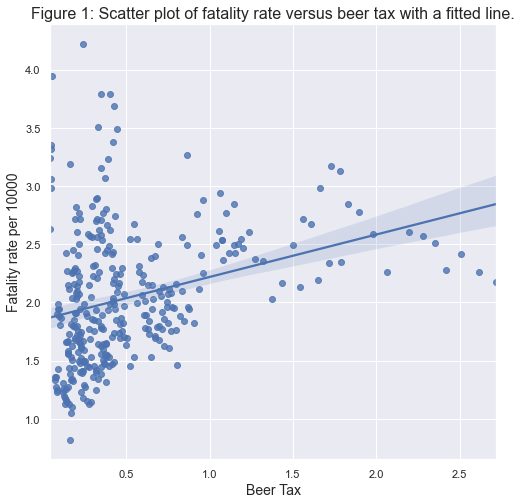

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
sns.set(rc={'figure.figsize':(8, 8)})
size_default = 14
size_large = 16
plt.rc('axes', titlesize = size_large, labelsize = size_default)

sns.regplot(x = "beertax", y = "fat_rate", data = da)
plt.xlabel("Beer Tax")
plt.ylabel("Fatality rate per 10000")
plt.title("Figure 1: Scatter plot of fatality rate versus \
beer tax with a fitted line.") 
plt.show()

## Exercise 4

Fit a simple OLS regression. This is what is called a "pooled" regression because we're "pooling" observations from different years into a single regression. What do your results imply about the relationship between Beer Taxes and fatalities?

\begin{align*}
FatalityRate_i = \beta_0 + \beta_1 \times BeerTax_i
\end{align*}

In [5]:
import statsmodels.formula.api as smf

model = smf.ols('fat_rate ~ beertax', da).fit()
model.get_robustcov_results('HC3').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               fat_rate   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     45.41
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           7.01e-11
Time:                        08:21:14   Log-Likelihood:                -271.04
No. Observations:                 336   AIC:                             546.1
Df Residuals:                     334   BIC:                             553.7
Df Model:                           1                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8533      0.047     39.097      0.000       1.760       1.947
beertax        0.3646      0.054      6.739      0.000       0.258       0.471
==============================================================================
Omnibus:                       66.653   Durbin-Watson:                   0.465
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.734
Skew:                           1.134   Prob(JB):                     3.31e-25
Kurtosis:                       4.707   Cond. No.                         2.76
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

> Given the positive coefficient of beertax with a zero p-value, it implies that the beer tax has a significant positive relationship with our response variable, fatility rate, on average. That's said generally, as the government increases the beer tax, the fatality rate also increases.

## Exercise 5

Now estimate your model again, this time adding state fixed effects (using the `C()` notation and your normal linear model machinery). What does this result imply about the relationship between beer taxes and fatalities?

In [6]:
model = smf.ols('fat_rate ~ beertax + C(state)', da).fit()
model.get_robustcov_results('HC3').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               fat_rate   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     107.8
Date:                Wed, 24 Feb 2021   Prob (F-statistic):          7.25e-157
Time:                        08:21:14   Log-Likelihood:                 107.97
No. Observations:                 336   AIC:                            -117.9
Df Residuals:                     287   BIC:                             69.09
Df Model:                          48                                         
Covariance Type:                  HC3                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.4776      0.394      8.828      0.000       2.702       4.253
C(state)[T.ar]    -0.6550      0.269     -2.439      0.015      -1.183      -0.126
C(state)[T.az]    -0.5677      0.330     -1.718      0.087      -1.218       0.083
C(state)[T.ca]    -1.5095      0.373     -4.044      0.000      -2.244      -0.775
C(state)[T.co]    -1.4843      0.363     -4.094      0.000      -2.198      -0.771
C(state)[T.ct]    -1.8623      0.344     -5.410      0.000      -2.540      -1.185
C(state)[T.de]    -1.3076      0.373     -3.510      0.001      -2.041      -0.574
C(state)[T.fl]    -0.2681      0.160     -1.677      0.095      -0.583       0.047
C(state)[T.ga]     0.5246      0.200      2.618      0.009       0.130       0.919
C(state)[T.ia]    -1.5439      0.325     -4.752      0.000      -2.183      -0.904
C(state)[T.id]    -0.6690      0.316     -2.116      0.035      -1.291      -0.047
C(state)[T.il]    -1.9616      0.358     -5.483      0.000      -2.666      -1.257
C(state)[T.in]    -1.4615      0.334     -4.372      0.000      -2.120      -0.804
C(state)[T.ks]    -1.2232      0.305     -4.012      0.000      -1.823      -0.623
C(state)[T.ky]    -1.2175      0.355     -3.434      0.001      -1.915      -0.520
C(state)[T.la]    -0.8471      0.249     -3.403      0.001      -1.337      -0.357
C(state)[T.ma]    -2.1097      0.338     -6.248      0.000      -2.774      -1.445
C(state)[T.md]    -1.7064      0.349     -4.885      0.000      -2.394      -1.019
C(state)[T.me]    -1.1079      0.246     -4.500      0.000      -1.593      -0.623
C(state)[T.mi]    -1.4845      0.290     -5.114      0.000      -2.056      -0.913
C(state)[T.mn]    -1.8972      0.324     -5.857      0.000      -2.535      -1.260
C(state)[T.mo]    -1.2963      0.331     -3.919      0.000      -1.947      -0.645
C(state)[T.ms]    -0.0291      0.182     -0.160      0.873      -0.387       0.329
C(state)[T.mt]    -0.3604      0.353     -1.022      0.308      -1.055       0.334
C(state)[T.nc]    -0.2905      0.142     -2.049      0.041      -0.570      -0.011
C(state)[T.nd]    -1.6234      0.344     -4.713      0.000      -2.301      -0.945
C(state)[T.ne]    -1.5222      0.310     -4.910      0.000      -2.132      -0.912
C(state)[T.nh]    -1.2545      0.265     -4.725      0.000      -1.777      -0.732
C(state)[T.nj]    -2.1057      0.377     -5.581      0.000      -2.848      -1.363
C(state)[T.nm]     0.4264      0.312      1.369      0.172      -0.187       1.040
C(state)[T.nv]    -0.6008      0.357     -1.683      0.093      -1.303       0.102
C(state)[T.ny]    -2.1867      0.366     -5.968      0.000      -2.908      -1.466
C(state)[T.oh]    -1.6744      0.309     -5.418      0.000      -2.283      -1.066
C(state)[T.ok]    -0.5451      0.258     -2.116      0.035      -1.052      -0.038
C(state)[T.o

> The negative coefficient of beertax of p-value smaller than 0.05 implies that in each state the beer tax has a siginificant negative relationship with the fatality rate. That's said, as each state government increases the beer tax, the fatality rate decreases.

## Exercise 6

Explain why your results in Exercises 4 (without fixed effects) and Exercise 5 (with state fixed effects) look so different. What does this imply about states with high beer taxes?

> Adding the state fixed effects allow us to difference out any constant differences among states, and focus only on changes within each state over time, which is the effects of beer taxes on the fatality rate. Therefore, without fixed effects, the estimate of beertax coefficient is actually an average of beer tax effects across all states, ignoring the baseline difference of fatality rates in different states without any beer tax. With the fixed effects of states controlled, the increase in beer taxes is associated with a decrease in fatality rates. Some states have high fatality rate without any alcohol tax. Therefore, without controlling states, we might conclude that beer taxs will boost the in-state fatality rate, which is actually not the truth. 

## Fixed Effects by Demeaning

Rather than just add indicator variables, we'll now use a different strategy for estimating fixed effects called an "entity-demeaning." This method is more computationally efficient, and can also help you understand how fixed effects work. 

Let's begin by assuming we want to estimate the following fixed-effect model:

\begin{align}
FatalityRate_{it} = \beta BeerTax_{it} + Z_i + \epsilon_{it} \tag{1}
\end{align}

Where $FatalityRate_{it}$ is the fatality rate of state $i$ in year $t$, $\beta BeerTax_{it}$ is the beer tax of state $i$ in year $t$. $Z_i$ is a state fixed effect.

Rather than adding indicator variables, however, we'll use entity-demean as follows: 

First, we take the average on both sides of the regression. Here $n$ is the number of periods. 

\begin{align*}
\frac{1}{n} \sum_{t=1}^n FatalityRate_{it} =& \, \beta_1 \frac{1}{n} \sum_{t=1}^n BeerTax_{it} + \frac{1}{n} \sum_{t=1}^n Z_i + \frac{1}{n} \sum_{t=1}^n \epsilon_{it} \\
\overline{FatalityRate} =& \, \beta_1 \overline{BeerTax}_i + Z_i + \overline{\epsilon}_i.  \tag{2}
\end{align*}

Substracting the  from the main equation yields:

\begin{align}
\begin{split}
FatalityRate_{it} - \overline{FatalityRate}_i =& \, \beta_1(BeerTax_{it}-\overline{BeerTax}_i) + (\epsilon_{it} - \overline{\epsilon}_i) \\
\overset{\sim}{FatalityRate}_{it} =& \, \beta_1 \overset{\sim}{BeerTax}_{it} + \overset{\sim}{\epsilon}_{it}. 
\end{split} 
\end{align}

By taking the difference between the value of each observation (state-year) and the mean value of the entity (state) over n periods, we analyze how the within-state variation of beer tax affects that of the fatality rate. Moreover, by doing so we no longer need to estimate the fixed effects of $Z_i$, saving computing power if we are working on a dataset with a large number of fixed effects.

## Exercise 7

Implement the above entity-demeaned approach to estimate the fixed-effects model by hand (use basic functions, not full tools like `PanelOLS` or `C()` notation in `python`, or `lfe` or `C()` notation in `R`). 

In [7]:
fat_rate_statemean = da.groupby("state")["fat_rate"].mean().reset_index()
fat_rate_statemean.columns = ["state", "fat_rate_mean"]

In [8]:
beertax_statemean = da.groupby("state")["beertax"].mean().reset_index()
beertax_statemean.columns = ["state", "beertax_mean"]

In [9]:
df_new = da.merge(fat_rate_statemean, on = "state", how = "right")
df_new = df_new.merge(beertax_statemean, on = "state", how = "right")

In [10]:
df_new["fate_rate_demeaned"] = df_new["fat_rate"] - df_new["fat_rate_mean"]
df_new["beertax_demeaned"] = df_new["beertax"] - df_new["beertax_mean"]

In [11]:
model_demeaned = smf.ols('fate_rate_demeaned ~ beertax_demeaned', df_new).fit()
model_demeaned.get_robustcov_results('HC3').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     fate_rate_demeaned   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     11.23
Date:                Wed, 24 Feb 2021   Prob (F-statistic):           0.000898
Time:                        08:21:15   Log-Likelihood:                 107.97
No. Observations:                 336   AIC:                            -211.9
Df Residuals:                     334   BIC:                            -204.3
Df Model:                           1                                         
Covariance Type:                  HC3                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.995e-17      0.010  -2.07e-15      1.000      -0.019       0.019
beertax_demeaned    -0.6559      0.196     -3.351      0.001      -1.041      -0.271
==============================================================================
Omnibus:                       53.045   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.863
Skew:                           0.585   Prob(JB):                     1.81e-48
Kurtosis:                       6.786   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

## Exercise 8

Fit the model with state fixed-effect using `PanelOLS` / `lfe`. Compare it to your by-hand output. Interpret the result.

In [12]:
da_multiindex = da.set_index(['state', da.index])
# da_multiindex.head(10)

In [13]:
from linearmodels import PanelOLS

mod = PanelOLS.from_formula('fat_rate ~ beertax + EntityEffects',
                            data = da_multiindex)
mod.fit(cov_type = 'clustered', cluster_entity = True)

Dep. Variable:,fat_rate,R-squared:,0.0407
Estimator:,PanelOLS,R-squared (Between):,-0.3805
No. Observations:,336,R-squared (Within):,0.0407
Date:,"Wed, Feb 24 2021",R-squared (Overall):,-0.3775
Time:,08:21:15,Log-likelihood,107.97
Cov. Estimator:,Clustered,,
,,F-statistic:,12.190
Entities:,48,P-value,0.0006
Avg Obs:,7.0000,Distribution:,"F(1,287)"
Min Obs:,7.0000,,
Max Obs:,7.0000,F-statistic (robust):,5.1576


> As we can see, the coefficients of the PanelOLS model are exactly the same as those we calculated in Exercise 5 as well as our by-hand outputs. It means across states the beer tax has a siginificant negative relationship with the fatality rate. That's said, as state governments increase the beer tax, the fatality rate decreases. However, the PanelOLS model produces larger standard error for the beertax variable, 0.2888, compared to 0.196 given by our by-hand output. 

## Exercise 9

Now (using `PanelOLS` or `lfe`) estimate a fixed effects model using the following specification. Add fixed effects for **both** the state and the year, as well as the other covariates you think are important $X_{it}$). 

Explain (a) the type of phenomenon we control for by adding `year` fixed effects, and (b) your choice of covariates. Cluster the standard error at the state level. Interpret the result.

\begin{align}
FatalityRate_{it} = \beta BeerTax_{it} + X_{it} + State_i + Year_t + \epsilon_{it}
\end{align}

In [14]:
da_multiindex1 = da.set_index(['state', 'year'])
# da_multiindex1.head(10)

In [15]:
mod1 = PanelOLS.from_formula('fat_rate ~ beertax + youngdrivers + \
EntityEffects + TimeEffects',
                            data = da_multiindex1)
mod1.fit(cov_type = 'clustered', cluster_entity = True)

Dep. Variable:,fat_rate,R-squared:,0.0544
Estimator:,PanelOLS,R-squared (Between):,0.0603
No. Observations:,336,R-squared (Within):,0.0258
Date:,"Wed, Feb 24 2021",R-squared (Overall):,0.0600
Time:,08:21:15,Log-likelihood,118.26
Cov. Estimator:,Clustered,,
,,F-statistic:,8.0478
Entities:,48,P-value,0.0004
Avg Obs:,7.0000,Distribution:,"F(2,280)"
Min Obs:,7.0000,,
Max Obs:,7.0000,F-statistic (robust):,2.5944


> (a) After adding year fixed effects, we control each observation by year and by state. Instead of averaging over the whole experiment period given the dataset, we add year fixed effects that can control for possible policy change withiin each year as states might execute different reugulations at different times. <br>
(b) Young people are usually over-represented in drinking driver injuries and deaths so the variable roungdrivers is considered. This variable has an apprent positive relationship with fatality rate as we may assume, but it's not significant statistically. <br>
(c) It is worth noting that the standard error of the beertax variable further increases since we include one more fixed effext, time, to account for the possibility of time-level shocks.

## Absolutely positively need the solutions?

*Don't use this link until you've really, really spent time struggling with your code!* Doing so only results in you cheating yourself. 

[Link](../solutions_warning.ipynb)